In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('churn_prepared.csv')

In [3]:
df.head()

,Tenure,Bandwidth_GB_Year
0,-0.534613,-0.546019
1,-0.639889,-0.569826
2,-0.367356,-0.281591
3,-0.342468,-0.256331
4,-0.630288,-0.691557


In [4]:
df_cluster = df[['Tenure', 'Bandwidth_GB_Year']]

In [5]:
df = df_cluster.iloc[:,:].values

In [6]:
df

array([[-0.53461297, -0.54601855],
       [-0.63988949, -0.56982572],
       [-0.36735607, -0.28159143],
       ...,
       [ 0.22378478,  0.20226104],
       [ 0.66586433,  0.73314055],
       [ 0.52127068,  0.59269989]])

C:\Users\jphun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jphun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jphun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jphun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

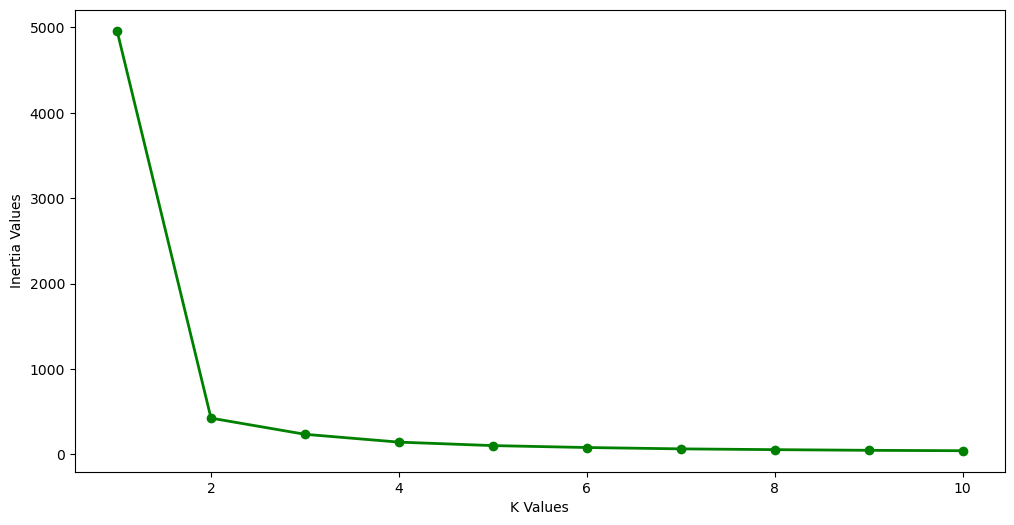

In [7]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize = (12, 6))
plt.plot(range(1,11), inertia, linewidth = 2, color = "green", marker = "o")
plt.xlabel("K Values")
plt.ylabel("Inertia Values")
plt.show()

In [8]:
km = KMeans(n_clusters = 2)
kmeans = km.fit_predict(df)

C:\Users\jphun\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


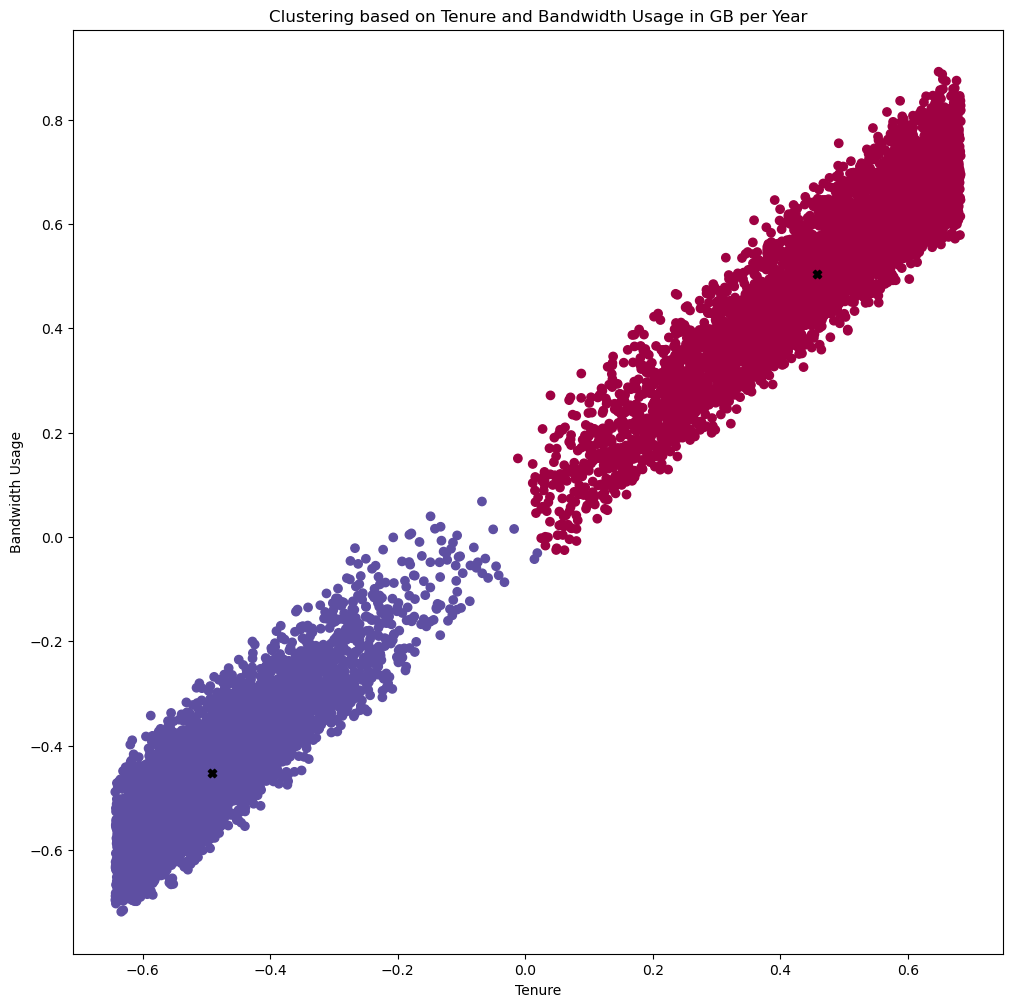

In [9]:
plt.figure(figsize = (12,12))
plt.scatter(df[:, 0], df[:,1], c = kmeans, cmap = 'Spectral')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker = 'X', color = 'black')
plt.xlabel('Tenure')
plt.ylabel('Bandwidth Usage')
plt.title('Clustering based on Tenure and Bandwidth Usage in GB per Year')
plt.show()

In [10]:
score = silhouette_score(df, kmeans)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.8124543931436965
